# Principle Component Analysis
Principle Component Analysis (PCA) is a dimensionality-reducing algorithm that helps to simplify data sets with a large number of variables. In our function, we will be using the covariance matrix of our input data to calculate the PCA and project our data onto 2-dimensions. For this project, we will be working with the iris data set to find the two features that account for the most variation.

In [263]:
import pandas as pd
import numpy as np
import numpy.linalg as lin
import statistics as stat
import matplotlib.pyplot as plt
from sklearn import datasets

In [264]:
iris = pd.read_csv("iris_data.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [265]:
# Separating our data into 
# x - the input data matrix, where each column is centered at 0
# y - the labels for each row of x
y = np.array(iris['Species'])

data = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
centered_sl = (np.array(data['SepalLength'] - round(np.mean(data['SepalLength']), 2))) 
centered_sw = (np.array(data['SepalWidth'] - round(np.mean(data['SepalWidth']), 2))) 
centered_pl = (np.array(data['PetalLength'] - round(np.mean(data['PetalLength']), 2))) 
centered_pw = (np.array(data['PetalWidth'] - round(np.mean(data['PetalWidth']), 2))) 
data['SepalLength'] = centered_sl
data['SepalWidth'] = centered_sw
data['PetalLength'] = centered_pl
data['PetalWidth'] = centered_pw

x = np.array(data)

C:\Users\chadw\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chadw\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\chadw\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [268]:
def PCA(x, features, y, plot=True):
    """
    Function to reduce the dimensions of x down to the 2 most important features
    INPUTS:
        - x, a numpy matrix (array) of size m x n where each column is a feature of data.
            x should also be normalized already.
        - features, the feature names of each of the columns of x, 
                    a list of length n
        - y, a numpy array of length m containing all the classifications
                        of each of the m observations
        - plot, if plot == True, then a scatter plot will be displayed where
                the x-axis is the most important feature and the y-axis is
                the second most important feature
    OUTPUTS:
        - A scatter plot, if plot == True
    """
    m = len(x)
    n = len(x[0])
    # Covariance matrix
    Q = np.matmul(x, x.T) # Since x is an m x n matrix, Q is m x m
    
    # Eigenvalues and Eigenvectors
    eigs = lin.eig(Q)
    eigvalues = eigs[0][range(n)] # There will be m eigenvalues
    eigvectors = eigs[1][range(n)] #        and an m x n eigenvector matrix 
    
    
    # Finding the two features (columns) of the data account for the most variability
    feature_df = pd.DataFrame({'features':features, 'eigvalues':eigvalues}).sort_values('eigvalues', ascending=False)
    xy_features = np.array(feature_df['features'])[range(2)]
    var_proportion = (feature_df['eigvalues'].loc[0] + feature_df['eigvalues'].loc[1]) / sum(np.array(feature_df['eigvalues']))
    print('The two chosen features account for ', 100*round(var_proportion.real, 2), '% of the variation in the data set')
    col_index1 = features.index(xy_features[0])
    col_index2 = features.index(xy_features[1])
    
    # Top 2 eigenvectors
    eigvectors = eigvectors[:, [col_index1, col_index2]] 
    
    # Projecting our data onto the 2-dimen
    basis = np.matmul(x, eigvectors) # m x 2 matrix containing the basis of our data points
    
    # if plot == True, then a plot will be created that shows how all of the
    # data was projected onto 
    if plot:
        plt.figure(figsize=(9,9))
        classes = np.unique(y)
        
        temp_df = pd.DataFrame(basis)
        temp_df['class'] = y
        max_x = 0
        min_x = 0
        max_y = 0
        min_y = 0
        for j in range(len(classes)):
            temp_df2 = temp_df[temp_df['class']==classes[j]]
            x_vals = []
            y_vals = []
            for item in np.array(temp_df2):
                x_vals.append(item[0].real)
                y_vals.append(item[1].real)
            plt.scatter(x_vals, y_vals, label=classes[j], zorder=2)
            if max(x_vals) > max_x:
                max_x = max(x_vals)
            if max(y_vals) > max_y:
                max_y = max(y_vals)
            if min(x_vals) < min_x:
                min_x = min(x_vals)
            if min(y_vals) < min_y:
                min_y = min(y_vals)
            
        # Plotting axes
        plt.plot([0, 0], [min_y-.1, max_y+.1], color='black', zorder=1, ls='--', lw=1.5, label='xy-axis')
        plt.plot([min_x-.1, max_x+.1], [0, 0], color='black', zorder=1, ls='--', lw=1.5)
        
        plt.title('Principle Component Analysis with Values Centered at 0')
        plt.legend()
    
#     return basis
    return

The two chosen features account for  98.0 % of the variation in the data set


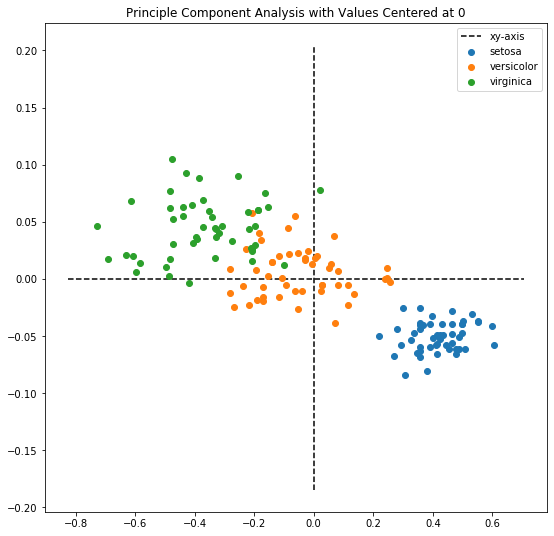

In [269]:
PCA(x, ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], y, plot=True)

# Classifying Digits
Here, we can now use a data set of digits and try to reduce them down to a functional 2D plot. Each picture is represented by an 8x8 array, so each row of the data matrix is 64 columns

In [270]:
digits = datasets.load_digits()
x = digits.data
len(x)

1797

In [271]:
# We can see that since each row is an 8x8 picture, it has 64 columns in it
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [272]:
y = digits.target
len(y)

1797

In [276]:
y[range(20)]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [273]:
for i in range(len(x)):
    x[i] = x[i] - np.mean(x[i])
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-4.593750,-4.593750,0.406250,8.406250,4.406250,-3.593750,-4.593750,-4.593750,-4.593750,-4.593750,...,-4.593750,-4.593750,-4.593750,-4.593750,1.406250,8.406250,5.406250,-4.593750,-4.593750,-4.593750
1,-4.890625,-4.890625,-4.890625,7.109375,8.109375,0.109375,-4.890625,-4.890625,-4.890625,-4.890625,...,-4.890625,-4.890625,-4.890625,-4.890625,-4.890625,6.109375,11.109375,5.109375,-4.890625,-4.890625
2,-5.375000,-5.375000,-5.375000,-1.375000,9.625000,6.625000,-5.375000,-5.375000,-5.375000,-5.375000,...,-0.375000,-5.375000,-5.375000,-5.375000,-5.375000,-2.375000,5.625000,10.625000,3.625000,-5.375000
3,-4.171875,-4.171875,2.828125,10.828125,8.828125,-3.171875,-4.171875,-4.171875,-4.171875,3.828125,...,4.828125,-4.171875,-4.171875,-4.171875,2.828125,8.828125,8.828125,4.828125,-4.171875,-4.171875
4,-4.031250,-4.031250,-4.031250,-3.031250,6.968750,-4.031250,-4.031250,-4.031250,-4.031250,-4.031250,...,-4.031250,-4.031250,-4.031250,-4.031250,-4.031250,-2.031250,11.968750,-0.031250,-4.031250,-4.031250


The two chosen features account for  56.99999999999999 % of the variation in the data set


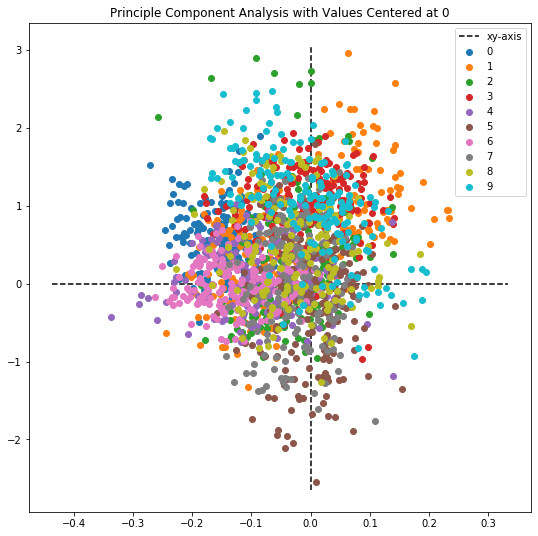

In [274]:
features = []
for i in range(len(x[0])):
    features.append(str(i))
    
PCA(x, features, y, plot=True)

# Conclusion
So, while we see that reducing the dimensions from 2 to 4 works well for a simpler data set like the iris data set. However, for a data set like the digits data set, we see that taking the dimensions from 64 to 2 is quite inadequate for classification of any kind. Performing PCA on the iris data set, we were able to maintain 98% of the original variability, while we were only able to maintain 57% of the variability with the digits data set.